# MathCamp 2019 | NSYSU

This file was built on  
* SageMath 8.6 
* Jupyter 4.4.0
* CoCalc 

Thanks to these softwares this lecture was made possible.

## Outline
1. Eulerian circuit
2. Euler's polyhedron formula
3. Searching algorithm

## Eulerian circuit

Leonhard Euler (1707&ndash;1783)
![Euler](Euler.png "Leonhard Euler")

(Portrait by Jakob Emanuel Handmann  
Source: [Wikipedia: Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler))

In Euler's time,  
Königsberg is a city in Prussia (now Kaliningrad, Russia).  
Pregel River cuts through the city and has two large islands on the river.  
There are seven bridges in the city.  

In 1736, Euler was pondering a question:
Can one walk through all the seven bridges exactly once and go back to the starting point?

![7bridges](7bridges.png  "Seven Bridges of Königsberg")
(Source: [Wikipedia: Seven Bridges of Königsberg](https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg))

A **graph** consist of a set of **vertices** $V$ and a set of **edges** $E$.

Each edge is incident to two vertices.

You may play around a graph on Radoslav Kirov's [JavaScript Graph Editor](https://radokirov.com/graph-editor.js/).

In [ ]:
V = [1,2,3,4] ### four vertices
E = [(1,2,'e1'),(1,2,'e2'),(1,3,'e3'),(1,3,'e4'),(1,4,'e5'),(2,4,'e6'),(3,4,'e7')] ### seven edges
pos = {1: (0,0), 2: (1,1), 3: (1,-1), 4: (2,0)}
G = Graph([V,E], multiedges=True, pos=pos)
G.show(figsize=[3,3],edge_labels=True)

In [ ]:
G.eulerian_circuit()

In [ ]:
V = [1,2,3,4] ### four vertices
E = [(1,2,'e1'),(1,2,'e2'),(1,3,'e3'),(1,3,'e4'),(2,3,'e5'),(2,4,'e6'),(3,4,'e7')] ### seven edges
pos = {1: (0,0), 2: (1,1), 3: (1,-1), 4: (2,0)}
H = Graph([V,E], multiedges=True, pos=pos)
H.show(figsize=[3,3],edge_labels=True)

In [ ]:
H.eulerian_circuit()

In [ ]:
walk_on_graph(G)

A **walk** is a sequence of edge $v_1v_2, v_2v_3, v_3v_4, \ldots$.  
A **closed walk** is a walk whose end point is its start point.

An **Eulerian circuit** on a graph $G$ is a closed walk that  
pass through each edge of $G$ exactly once.

The **degree** of a vertex is the number of edges incident to it.

#### Observation
If a graph has an Eulerian circuit,  
then every vertex has _even_ degree.

#### Corollary
The graph of the seven bridges of Königsberg  
does not have an Eulerian circuit.

#### Definition
A graph is **connected**  
if for any two vertices $i$ and $j$  
there is a walk going from $i$ to $j$.

In [ ]:
sshow(graphs.CycleGraph(4),'connected')

sshow(graphs.CycleGraph(3).disjoint_union(graphs.CycleGraph(3)),'not connected')

#### Observation
If a graph has an Eulerian circuit,  
then it is _connected_.

#### Theorem (Euler 1736)
If a graph is connected and every vertex has even degree,  
then it has an Eulerian circuit.

Question:  Try to find an Eulerian circuit in the following graph.

In [ ]:
g = Graph([five_V, sum(five_E,[])], pos=five_pos)
pic1 = g.plot(figsize=[3,3])
pic1.show()

In [ ]:
center_walk = DiGraph([five_V,five_E[0]], pos=five_pos)
pic1 += center_walk.plot(figsize=[3,3], edge_color='red')
pic1.axes(False)
pic1.show(title='Not always work')

#### Observation
Let $G$ be a graph.  
If every vertex of $G$ has even degree,  
then by removing the edges of a closed walk from a graph,  
every vertex of the new graph still has even degree.

In [ ]:
@interact

def _(step=slider(list(range(10)))):
    base = step // 2
    has_walk = step % 2
    base_graph = Graph([five_V,sum(five_E[base:],[])], pos=five_pos)
    pic1 = base_graph.plot(figsize=[3,3])
    if has_walk:
        walk_graph = DiGraph([five_V,five_E[base]], pos=five_pos)
        pic1 += walk_graph.plot(figsize = [3,3], edge_color = rainbow(5)[base])
    pic1.axes(False)
    pic1.show()

In [ ]:
base_graph = Graph([five_V,sum(five_E,[])], pos=five_pos)
walk_graph = DiGraph([five_V,sum(five_E,[])], pos=five_pos)
pic1 = base_graph.plot(figsize=[3,3])
pic1 += walk_graph.plot(figsize = [3,3], edge_colors={rainbow(5)[k]: five_E[k] for k in range(5)} )
pic1.axes(False)
pic1.show()

#### Proof of Euler's Theorem
**Assumption:**  
1. Every vertex of $G$ has even degree
2. $G$ is connected

**Algorithm:**  
1. Partition the edges of $G$ into several closed walks.  \[By Assumption 1\]
2. Start from any closed walk
3. When encouter a new clowed walk, **finish the new walk first**.
4. Eventually, all closed walks will be connected \[By Assumption 2\]
5. An Eulerian circuit found!

![Algorithm for finding an Eulerian circuit](five_eulerian.gif)

## Euler's polyhedron formula
Suppose a polyhedron has $V$ vertices, $E$ edges, and $F$ faces.  
Then $V-E+F = 2$.

In [ ]:
@interact
def _(
    faces = selector([4,6,8,12,20], buttons=True)
    ):
    f_to_g = {4: graphs.TetrahedralGraph(), 6: graphs.HexahedralGraph(), 8: graphs.OctahedralGraph(), 12: graphs.DodecahedralGraph(), 20: graphs.IcosahedralGraph()}
    g = f_to_g[faces]
    print('V - E + F = {} - {} + {} = {}'.format(g.order(), g.size(), faces, g.order() - g.size() + faces))
    g.plot3d().show()

#### Corollary
There are only five platonic solids.

#### Proof
The face can be a triangle, a square, or a pentagon.  
Let $k$ be the number of the degree of each vertex.

**Case 1.  Triangle**
$3F = 2E$, so $F = \frac{2}{3}E$.  
Since the angle of a triangle is $60^\circ$, $k$ can be $3,4,5$.  

**Case 1a.  $k=3$**  
$3V = 2E$, so $V = \frac{2}{3}E$.  
Thus,  
$V-E+F = \frac{2}{3}E - E + \frac{2}{3}E = 2$.  
This means  
$2E - 3E + 2E = 6$ and $E = 6$.  
**So** $V=4, E=6, F=4$: tetra

**Case 1b.  $k=4$**  
$4V = 2E$, so $V = \frac{1}{2}E$.  
Thus,  
$V-E+F = \frac{1}{2}E - E + \frac{2}{3}E = 2$.  
This means  
$3E - 6E + 4E = 12$ and $E = 12$.  
**So** $V=6, E=12, F=8$: oct

**Case 1c.  $k=5$**  
$5V = 2E$, so $V = \frac{2}{5}E$.  
Thus,  
$V-E+F = \frac{2}{5}E - E + \frac{2}{3}E = 2$.  
This means  
$6E - 15E + 10E = 30$ and $E = 30$.  
**So** $V=12, E=30, F=20$: ico

**Case 2.  Square**
$4F = 2E$, so $F = \frac{1}{2}E$.  
Since the angle of a triangle is $90^\circ$, $k$ has to be $3$.  
Thus,  
$3V = 2E$, so $V = \frac{2}{3}E$.  
Thus,  
$V-E+F = \frac{2}{3}E - E + \frac{1}{2}E = 2$.  
This means  
$4E - 6E + 3E = 12$ and $E = 12$.  
**So** $V=8, E=12, F=6$: hex

**Case 3.  Pentagon**
$5F = 2E$, so $F = \frac{2}{5}E$.  
Since the angle of a triangle is $108^\circ$, $k$ has to be $3$.  
Thus,  
$3V = 2E$, so $V = \frac{2}{3}E$.  
Thus,  
$V-E+F = \frac{2}{3}E - E + \frac{2}{5}E = 2$.  
This means  
$10E - 15E + 6E = 30$ and $E = 30$.  
**So** $V=20, E=30, F=12$: dod

This completes the proof!

#### Observation  
Every polygon can be embedded on a plane with an **outer face**.

![Platonic solids on a plane](planar_solids.gif "Platonic solids on a plane")



graph_editor()

#### Definition
A **planar graph** is a graph that can be embedded on a plane without its edges crossing. 

Every plantonic soild is a planar graph.

Any **Cycle** is a planar graph.

In [ ]:
multi_sshow([graphs.CycleGraph(k).graph6_string() for k in range(3,8)])

#### Theorem  
Let $G$ be a connected graph that contains a cycle.  
If $G$ is a plane gaph with $V$ vertices, $E$ edges, and $F$ faces,  
then $V-E+F=2$.

#### Observation  
A cycle on $n$ vertices has $V-E+F = n-n+2 = 2$.

#### Observation
Let $G$ be a graph that satisfies all conditions in Theorem.  
Then one may construct $G$ from a cycle by only two operations:  
1. add a new vertex and join it to an existing edge
2. add a new edge

Try it on Radoslav Kirov's [JavaScript Graph Editor](https://radokirov.com/graph-editor.js/).

#### Proof of Theorem
Prove by induction!  
Action 1: $V'=V+1$, $E'=E+1$, and $F'=F$, so $V'-E'+F' = (V+1)-(E+1)+F = 2$.  
Action 2: $V'=V$, $E'=E+1$, and $F'=F+1$, so $V'-E'+F' = V-(E+1)+(F+1) = 2$.

## Graph coloring

Some stories:  
In 1852, **Francis Guthrie** noticed that the map of the counties of England can be colored by **four colors** only.  
Francis told his brother, and his brother told his advisor **Augustus De Morgan**.  

> **Question:**  Can every map be colored by **four colors** so that adjacent countries have different colors?

Many attempts were made to prove (or disprove) this statement.  
**Alfred Kempe** gave a proof in **1879**;  
**Peter Guthrie Tait** gave another proof in **1880**.  
**Percy Heawood** found a mistake in Kempe's proof in **1890**;  
**Julius Petersen** found a mistake in Tait's proof in **1891**.

![A world map in four colors](world_map_four_colors.png "A world map in four colors")

(Source:  [Wikipedia: Four color theorem](https://en.wikipedia.org/wiki/Four_color_theorem))

![Simplify a map to a planar graph](color_planar.png "Simplify a map to a planar graph")

(Source:  [Wikipedia: Four color theorem](https://en.wikipedia.org/wiki/Four_color_theorem))

The map coloring problem is converted to
> **Question:**  Can every planar graph be colored by **four colors** so that adjacent verties have different colors?

In [ ]:
g = graphs.TetrahedralGraph()
g.set_pos({0:(0,0), 1:(0,1), 2:(0.8,-0.5), 3:(-0.8,-0.5)})
illustrate_FS(g,0,'BFS',searching_tree=False,coloring=True)

In [ ]:
g = graphs.HexahedralGraph()
g.set_pos({0:(0,3), 1:(3,3), 2:(3,0), 3:(0,0), 4:(1,2), 5:(2,2), 6:(2,1), 7:(1,1)})
illustrate_FS(g,0,'BFS',searching_tree=False,coloring=True)

In [ ]:
g = graphs.OctahedralGraph()
illustrate_FS(g,0,'BFS',searching_tree=False,coloring=True)

In [ ]:
g = graphs.DodecahedralGraph()
illustrate_FS(g, 0, 'BFS', searching_tree=False, coloring=True)

**Coloring problem on a graph**  

What is the minimum number of colors required to color vertices of a graph,  
so that adjacent vertices have different colors?

The minimum number of colors required is called the **chromatic number** $\chi(G)$.

In [ ]:
g = graphs.DodecahedralGraph()
g.show(vertex_colors=g.coloring(hex_colors=True))

In [ ]:
g = graphs.IcosahedralGraph()
g.show(vertex_colors=g.coloring(hex_colors=True))

#### Four color theorem (Robertson, Sanders, Seymour, and Thomas 1997)
Every planar graph can be colored by four colors.

**The proof relies on computers.**

## Searching algorithm
The purpose of a searching algorithm is  
to go through every vertex (or edges or both) in a systematic way.  

Here we introduce two important type.:
1. Depth-first search
2. Breadth-first search

This graph is called the **Petersen graph**.

In [ ]:
g = graphs.PetersenGraph()
g.show()

**Depth-first search** (DFS)  
Go as deep as possible.  
If no more, return to the previous vertex that can go deeper.  

Example: Solving a maze.

In [2]:
g = graphs.PetersenGraph()
v = 0
illustrate_FS(g, v, 'DFS')

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjgzZWFhYmY1Nzg+IHdpdGggMiB3aWRnZXRzCiAgc3RlcDogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXUnc3RlcCfigKY=


**Breadth-first search** (BFS)  
Go through all neighbors first.  
If no more, go to the first searched vertex that still has an unsearched neighbor.

Example: Finding the distance.

In [4]:
g = graphs.PetersenGraph()
v = 0
illustrate_FS(g, v, 'BFS')

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjgzZTdlM2QzOTg+IHdpdGggMiB3aWRnZXRzCiAgc3RlcDogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXUnc3RlcCfigKY=


**Greedy coloring algorithm**  
Fix an order of the vertices.  
Give the first available color to each vertex in order.  

In [7]:
g = graphs.PetersenGraph()
v = 0
illustrate_FS(g, v, 'BFS', coloring=True)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjgzZTdhZjJjZjg+IHdpdGggMiB3aWRnZXRzCiAgc3RlcDogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXUnc3RlcCfigKY=


In [ ]:
g = graphs.PetersenGraph()
v = 0
illustrate_FS(g, v, 'DFS', coloring=True)

Different order gives different coloring and uses different number of colors.

The **degree** of a vertex is the number of edges incident to it.  
Let $\Delta(G)$ be the **maximum degree** of the graph $G$.  
Let $\delta(G)$ be the **minimum degree** of the graph $G$.

#### Observation
By the greedy coloring algorithm (with any vertex order),  
$\chi(G)\leq \Delta(G)+1$.

An **odd cycle** $C_{2k+1}$ has  
$\Delta(C_{2k+1})=2$ and  
$\chi(C_{2k+1})=2+1=3$.

In [8]:
g = graphs.CycleGraph(5)
illustrate_FS(g, 0, 'DFS', searching_tree=False, coloring=True)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3Zjg1ZTI2Y2ZjMDg+IHdpdGggMiB3aWRnZXRzCiAgc3RlcDogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXUnc3RlcCfigKY=


An **complete graph** (all edges occur) $K_n$ has  
$\Delta(K_n)=n-1$ and  
$\chi(K_n)=n-1 + 1=n$.

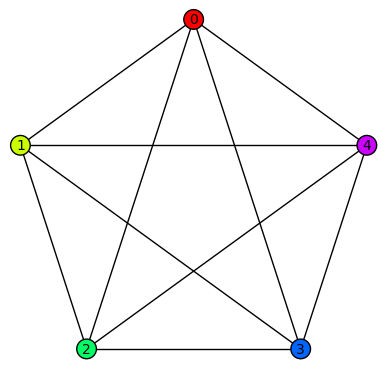

In [9]:
g = graphs.CompleteGraph(5)
g.show(vertex_colors=g.coloring(hex_colors=True))

#### Brook's theorem
If $G$ is not a complete graph and not an odd cycle,  
then $\chi(G)\leq \Delta(G)$.

**The proof requires DFS.**

**Enjoy!  Thanks!**

**Below is not part of the lecture**

In [1]:
### Necessary code:  Run this cell first!

load("https://raw.githubusercontent.com/jephianlin/minimum_rank_aux/master/general_Lib.sage");

five_V = list(range(1,17))
five_E = [[(6,7),(7,11),(11,10),(10,6)],[(1,2),(2,6),(6,5),(5,1)],[(3,4),(4,8),(8,7),(7,3)],[(9,10),(10,14),(14,13),(13,9)],[(11,12),(12,16),(16,15),(15,11)]]
five_pos = {k: ((k-1) % 4, -((k-1) // 4) ) for k in five_V}

def walk_on_graph(G):
    ### edges of g has to be labeled as e1,...,em. 
    walked = []
    m = G.size()
    n = G.order()
    V = G.vertices()
    E = G.edges()
    
    @interact
    def _(
        next_step = selector(['e{}'.format(k) for k in range(1,m+1)], buttons=True),
        new_game = selector(['restart', 'continue'], default = 'continue', buttons=True)
        ):
        if new_game == 'continue':
            if next_step not in walked:
                walked.append(next_step)
        if new_game == 'restart':
            while walked:
                discard = walked.pop()
        print(walked)
        walked_edges = [edge for edge in E if edge[2] in walked]
        G.show(figsize=[3,3],edge_labels=True, edge_colors={'red': walked_edges})
        
def DFS_tree(g, v):
    searched = []
    arcs = []
    for new in g.depth_first_search(v):
        if searched:
            for i in range(1,len(searched)+1):
                if g.has_edge(new,searched[-i]):
                    parent = searched[-i]
                    break;
            arcs.append((parent,new))
        searched.append(new)
    return arcs

def BFS_tree(g, v):
    searched = []
    arcs = []
    for new in g.breadth_first_search(v):
        if searched:
            for i in range(len(searched)):
                if g.has_edge(new,searched[i]):
                    parent = searched[i]
                    break;
            arcs.append((parent,new))
        searched.append(new)
    return arcs

def greedy_coloring(g, color_order=None):
    n = g.order()
    ### ideally, len(color_order) == n
    if color_order == None:
        color_order = g.vertices()
    color_order = list(color_order) ### change the type in case it is a generator
    num_c = {k: [] for k in range(n)}
    for s in range(n):
        new = color_order[s]
        for k in range(n):
            for u in num_c[k]:
                if g.has_edge(u,new):
                    break;
            else:
                num_c[k].append(new)
                break;
    num_c_used = [k for k in range(n) if num_c[k]]
    greedy_chi = len(num_c_used)
    colors = rainbow(greedy_chi) 
    c = {colors[k]: num_c[k] for k in range(greedy_chi)}
    return c

def illustrate_FS(g, v, alg='DFS', searching_tree=True, coloring=False):
    ### g should have its position saved
    ### if not do g.plot(save_pos) first
    if alg == 'DFS':
        arcs = DFS_tree(g,v)
        full_name = 'Depth-First Search at {}'.format(v)
    if alg == 'BFS':
        arcs = BFS_tree(g,v)
        full_name = 'Breadth-First Search at {}'.format(v)
    steps = len(arcs)
    pic1 = g.plot()
    
    if coloring:
        color_order = [v] + [arc[1] for arc in arcs]
        c = greedy_coloring(g, color_order)
    else:
        c = {}
        
    @interact
    def _(step=slider(list(range(steps+1))), t = text_control(full_name)):
        g_pos = g.get_pos()
        arcs_show = arcs[:step] if searching_tree else []
        pic2 = DiGraph([g.vertices(),arcs_show], pos=g_pos).plot(edge_color='red', vertex_colors=c)
        unreached = [arc[1] for arc in arcs[step:]]
        cover = Graph([unreached,[]], pos={u: g_pos[u] for u in unreached}).plot()
        p = pic1 + pic2 + cover
        p.axes(False)
        p.show()

---sshow, multi_sshow, tuple_generator, minimal_graphs, empty_array, all_one_matrix, elementary_matrix, eigens_multi, sort_dictionary, has_minor, etc.


In [ ]:
### No need to run this cell
### Code for generating the five_eulerian.gif

# a = sum(five_E,[])
# b = sum([[rainbow(5)[k]] * 4 for k in range(5)],[])
# zip(a,b)

enc = [
 ((13, 9), '#0066ff'),    
 ((9, 10), '#0066ff'),
 ((10, 6), '#ff0000'),
 ((6, 5), '#cbff00'),
 ((5, 1), '#cbff00'),
 ((1, 2), '#cbff00'),
 ((2, 6), '#cbff00'),
 ((6, 7), '#ff0000'),
 ((7, 3), '#00ff66'),
 ((3, 4), '#00ff66'),    
 ((4, 8), '#00ff66'),
 ((8, 7), '#00ff66'),    
 ((7, 11), '#ff0000'),
 ((11, 12), '#cc00ff'),
 ((12, 16), '#cc00ff'),
 ((16, 15), '#cc00ff'),
 ((15, 11), '#cc00ff'),    
 ((11, 10), '#ff0000'),
 ((10, 14), '#0066ff'),
 ((14, 13), '#0066ff')
]

def categorize(partial_enc):
    c = {}
    for pair in partial_enc:
        if pair[1] not in c.keys():
            c[pair[1]] = [pair[0]]
        else:
            c[pair[1]].append(pair[0])
    return c

pics = []

for i in range(21):
    E = [pair[0] for pair in enc[:i]]
    base_graph = Graph([five_V, sum(five_E,[])], pos=five_pos)
    pic1 = base_graph.plot(figsize=[3,3])
    c = categorize(enc[:i])

    walk_graph = DiGraph([five_V, E], pos=five_pos)
    pic1 += walk_graph.plot(figsize=[3,3], edge_colors=c)
    pic1.axes(False)
    pics.append(pic1)
    #pic1.show()
    
five_animate = animate((pic for pic in pics))
five_animate

#five_animate.gif(savefile='five_eulerian_test.gif')

In [ ]:
five_animate.gif(savefile='five_eulerian_test.gif')